In [1]:
import numpy as np
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import time
import matplotlib.pyplot as plt

In [2]:
def readfile( file_name):
    file = open( file_name , 'r')
    data = file.read()
    file.close()
    data = np.array( data.split( ))
    data = data.reshape( [int(len(data)/4) , 4] )
    return data

def populate ( matrix , data):
    for i in range(data.shape[0]):
        matrix[int(data[i][0])-1][int(data[i][1])-1] = data[i][2]
    return matrix

def makeRitingMatrix(i):
    riting_b = np.zeros(943*1682).reshape((943,1682))
    riting_t = np.zeros(943*1682).reshape((943,1682))
 #   for i in ['1','2','3','4','5']:
    data1 = readfile('ml-100k/u' + i + '.base')
    data2 = readfile('ml-100k/u' + i + '.test')
    populate(riting_b,data1)
    populate(riting_t,data2)
    return riting_b, riting_t


In [3]:
def matrix_factorization(R, R_t, P, Q, K, steps=500, alpha=0.0002, beta=0.02):
    Q = Q.T
    #L_v = []
    e_list = []
    for step in range(steps):
       # L_v.append(loss(np.dot(P, Q), P, Q, lam_p, lam_q))
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        if step%10 == 0:
            e = 0
            for i in range(len(R_t)):
                for j in range(len(R_t[i])): 
                    if R_t[i][j] > 0:
                        e = e + pow(R_t[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                        for k in range(K):
                            e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
            e = e/(R.shape[0]*R.shape[1])
            e_list.append(e)
            print(e)
            if e < 0.001:
                break
    return P, Q.T, e_list


0.122631666957
0.0319609903852
0.0201121616816
0.0166616569202
0.0151410037122
0.0143260114481
0.013834806758
0.0135151102037
0.013295576008
0.0131387545564
0.0130232770193
0.0129361530716
0.0128690855553
0.0128165604295
0.0127747912904
0.0127411049328
0.0127135679664
0.0126907516231
0.0126715790458
0.0126552235517
0.012641039383
0.0126285137387
0.012617233102
0.0126068593858
0.0125971129537
0.0125877605264
0.0125786065913
0.0125694873238
0.0125602662937
0.0125508314114
0.0125410927033
0.0125309806111
0.0125204445945
0.01250945188
0.012497986256
0.0124860468417
0.0124736467876
0.0124608118744
0.0124475789941
0.0124339945048
0.0124201124739
0.0124059928361
0.0123916995162
0.0123772985753
0.0123628564462
0.0123484383195
0.0123341067327
0.0123199203963
0.0123059332775
0.0122921939407


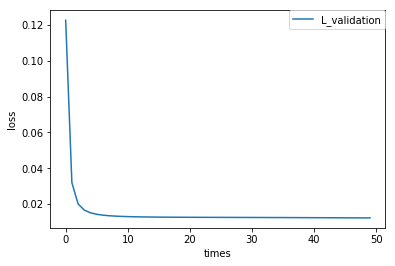

In [4]:
riting_b , riting_t = makeRitingMatrix('1')
N = len(riting_b)
M = len(riting_b[0])
K = 2

P = np.random.rand(N,K)
Q = np.random.rand(M,K)


nP, nQ, L_v = matrix_factorization(riting_b, riting_t, P, Q, K)

plt.xlabel('times')
plt.ylabel('loss')
plt.plot(np.arange(len(L_v)),np.array(L_v),label="L_validation")
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)  
plt.show()

In [5]:
error = 0
nR = np.dot(nP, nQ.T)
for i in range(len(riting_t)):
    for j in range(len(riting_t[i])):
        if (np.square(nR[i][j]-riting_t[i][j])>=0.25 and riting_t[i][j]!=0 ):
            error = error + 1
print('accurancy:', error/(N*M))

accurancy: 0.007328547668974596
